### this code have several assumptions:  
1. the datacenter can set several computational speed, which corresponde to different energy consumption
2. when there is extra power generated by solar panels, there are few options to deal with it: 
    1) save to energy storage facility for the future
    2) sold back to the grid
3. when there is not enough power for training the AI model, the datacenter can:
    1) consume power from grid
    2) set to lower level of computational speed


In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [174]:
# read the PVWattsHourly_Mod.csv file
df = pd.read_csv('PVWattsHourly_Mod.csv')
df

,Month,Day,Hour,AC System Output (W),AC System Output (kWh)
0,1,1,0,0.0,0.0
1,1,1,1,0.0,0.0
2,1,1,2,0.0,0.0
3,1,1,3,0.0,0.0
4,1,1,4,0.0,0.0
...,...,...,...,...,...
8755,12,31,19,0.0,0.0
8756,12,31,20,0.0,0.0
8757,12,31,21,0.0,0.0
8758,12,31,22,0.0,0.0


### in here we have to set several assumptions about the several levels of computational speed and the correspond energy consumption  
1. set that to complete a deep learning model to complete training, will require that the computational resource train the model in max power model consume 10000kWh
2. in here we need to consider that in different speed, will have different energy consumption, there is a situation that with different computaitonal speed,   
the energy consumption is not always the proportion which means that, with the lower computational speed,  
the energy consumption efficiency may be lower than higher computational speed in here, the table below just consumption,  
all the detailed information will be added after deeper research into the actual consumption information  

| Level | Computational Speed (in ratio) | Energy Consumption (Wh) | Energy Consumption/Ratio |
|-------|-------------------------------|-------------------------|--------------------------|
| 1     | 0.2                           | 1400                    | 700                      |
| 2     | 0.5                           | 3250                    | 650                      |
| 3     | 0.8                           | 4400                    | 550                      |
| 4     | 1.0                           | 5000                    | 500                      |
| 5     | 1.2                           | 5700                    | 475                      |
| 6     | 1.5                           | 6750                    | 450                      |
| 7     | 1.8                           | 7200                    | 400                      |
| 8     | 2.0                           | 7500                    | 350                      |
| 9     | 3.0                           | 8700                    | 290                      |
| 10    | 4.0                           | 10000                   | 250                      |

### CONDITION 1

In [175]:
# print the first 20 rows of the dataframe
print(df.head(20))

    Month  Day  Hour  AC System Output (W)  AC System Output (kWh)
0       1    1     0                 0.000                0.000000
1       1    1     1                 0.000                0.000000
2       1    1     2                 0.000                0.000000
3       1    1     3                 0.000                0.000000
4       1    1     4                 0.000                0.000000
5       1    1     5                 0.000                0.000000
6       1    1     6                 0.000                0.000000
7       1    1     7                 0.000                0.000000
8       1    1     8                 0.000                0.000000
9       1    1     9              2547.074                2.547074
10      1    1    10              4123.633                4.123633
11      1    1    11              5349.942                5.349942
12      1    1    12              5651.579                5.651579
13      1    1    13              5261.851                5.26

In [176]:
# set the total energy consumption that needed to complete the task
total_energy = 3000 # in Wh

In [177]:
# set the computational speed and corresponding energy consumption for each level, the energy consumption is in Wh
level1_speed, level1_consumption = 0.2, 1400
level2_speed, level2_consumption = 0.5, 3250
level3_speed, level3_consumption = 0.8, 4400
level4_speed, level4_consumption = 1.0, 5000
level5_speed, level5_consumption = 1.2, 5700
level6_speed, level6_consumption = 1.5, 6750
level7_speed, level7_consumption = 1.8, 7200
level8_speed, level8_consumption = 2.0, 7500
level9_speed, level9_consumption = 3.0, 8700
level10_speed, level10_consumption = 4.0, 10000

In [178]:
# change the AC System Ouput (W) to a ndarray
energy_output  = df['AC System Output (W)'].values
# plt.plot(energy_output[5040:6480])

In [179]:
# save the train percentage due to the energy consumption and the energy output
train_speed = np.zeros(energy_output.shape)
train_consumption = np.zeros(energy_output.shape)
conditions = [
    (energy_output >= level1_consumption) & (energy_output < level2_consumption),
    (energy_output >= level2_consumption) & (energy_output < level3_consumption),
    (energy_output >= level3_consumption) & (energy_output < level4_consumption),
    (energy_output >= level4_consumption) & (energy_output < level5_consumption),
    (energy_output >= level5_consumption) & (energy_output < level6_consumption),
    (energy_output >= level6_consumption) & (energy_output < level7_consumption),
    (energy_output >= level7_consumption) & (energy_output < level8_consumption),
    (energy_output >= level8_consumption) & (energy_output < level9_consumption),
    (energy_output >= level9_consumption) & (energy_output < level10_consumption),
    energy_output >= level10_consumption
]
choices_speed = [level1_speed, level2_speed, level3_speed, level4_speed, level5_speed, level6_speed, 
                 level7_speed, level8_speed, level9_speed, level10_speed]
choices_consumption = [level1_consumption, level2_consumption, level3_consumption, level4_consumption, 
                       level5_consumption, level6_consumption, level7_consumption, level8_consumption,
                       level9_consumption, level10_consumption]

train_speed = np.select(conditions, choices_speed, default=0)
train_consumption = np.select(conditions, choices_consumption, default=0)

print(train_speed[:20], '\n', train_consumption[:20])

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.5 1.  1.  1.  0.5 0.2 0.  0.
 0.  0. ] 
 [   0    0    0    0    0    0    0    0    0 1400 3250 5000 5000 5000
 3250 1400    0    0    0    0]


In [180]:
def calculate_train_percentage(total_energy, energy_output, train_speed, train_consumption):
    train_percentage = np.zeros(energy_output.shape)
    train_energy_total = np.zeros(energy_output.shape)
    for i in range(len(energy_output)):
        train_percentage[i] = train_speed[:i].sum()
        train_energy_total[i] = train_consumption[:i].sum()
    
    for j in range(len(energy_output)):
        if train_percentage[j] >= total_energy:
            train_percentage[j] = total_energy
            train_energy_total[j] = train_energy_total[j-1]
    
    return train_percentage, train_energy_total

In [181]:
train_percentage, train_energy_total = calculate_train_percentage(total_energy, energy_output, train_speed, train_consumption)
print(train_percentage[:20], '\n', train_energy_total[:20])

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.7 1.7 2.7 3.7 4.2 4.4 4.4
 4.4 4.4] 
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  1400.  4650.  9650. 14650. 19650. 22900. 24300. 24300. 24300. 24300.]


In [182]:
index1 = np.where(train_percentage >= total_energy)[0][0]
print(index1)

# change the 7765th hour in a year to a day in a year
index2 = index1 % 24
index3 = index1 // 24
print('the day is:', index3, 'the hour is:', index2)

7765
the day is: 323 the hour is: 13


In [183]:
# calculate the total energy consumption
total_energy_consumption = train_energy_total[:index1]
print('the total energy consumption is:', total_energy_consumption[-1]/1000, 'kWh')

the total energy consumption is: 13185.2 kWh


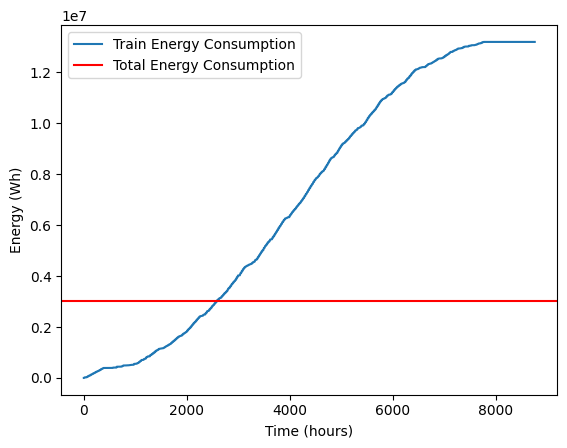

In [184]:
# plot the train energy consumption, with a horizontal line indicating the total energy consumption
plt.plot(train_energy_total, label='Train Energy Consumption')
plt.axhline(y=total_energy*1000, color='r', linestyle='-', label='Total Energy Consumption')
plt.xlabel('Time (hours)')
plt.ylabel('Energy (Wh)')
plt.legend()
plt.show()

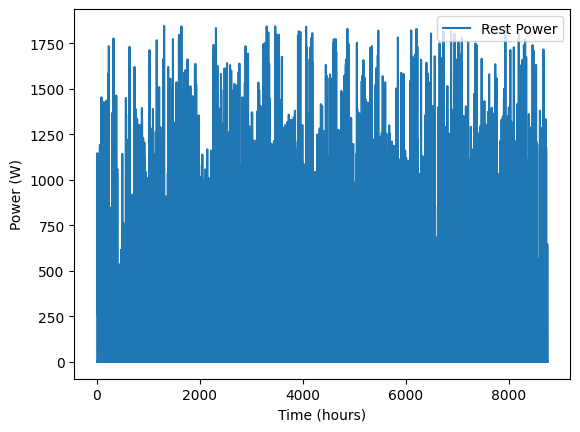

In [185]:
# calculate the rest power that generated by the solar panel but did not use
rest_power = energy_output - train_consumption

# plot the rest power
plt.plot(rest_power, label='Rest Power')
plt.xlabel('Time (hours)')
plt.ylabel('Power (W)')
plt.legend()
plt.show()

### CONDITION 2

In [186]:
# for each time the solar panel generated power, try to consume the power from the solar panel as well as the grid to match the nearest level of the train energy consumption
grid_energy = np.zeros(energy_output.shape)
conditions_grid = [
    (energy_output > 0) & (energy_output < level1_consumption),
    (energy_output >= level1_consumption) & (energy_output < level2_consumption),
    (energy_output >= level2_consumption) & (energy_output < level3_consumption),
    (energy_output >= level3_consumption) & (energy_output < level4_consumption),
    (energy_output >= level4_consumption) & (energy_output < level5_consumption),
    (energy_output >= level5_consumption) & (energy_output < level6_consumption),
    (energy_output >= level6_consumption) & (energy_output < level7_consumption),
    (energy_output >= level7_consumption) & (energy_output < level8_consumption),
    (energy_output >= level8_consumption) & (energy_output < level9_consumption),
    (energy_output >= level9_consumption) & (energy_output < level10_consumption),
    energy_output >= level10_consumption
]
choices_speed_grid = [level1_speed, level2_speed, level3_speed, level4_speed, level5_speed, level6_speed, 
                 level7_speed, level8_speed, level9_speed, level10_speed, level10_speed]
choices_consumption_grid = [level1_consumption, level2_consumption, level3_consumption, level4_consumption, 
                       level5_consumption, level6_consumption, level7_consumption, level8_consumption,
                       level9_consumption, level10_consumption, level10_consumption]

train_speed_grid = np.select(conditions_grid, choices_speed_grid, default=0)
train_consumption_grid = np.select(conditions_grid, choices_consumption_grid, default=0)
            
print(train_speed_grid[:20], '\n', train_consumption_grid[:20])

for i in range(len(energy_output)):
    if energy_output[i] > 0:
        if train_consumption_grid[i] > energy_output[i]: # if the energy consumption is larger than the energy output, which the outer power is needed from the grid
            grid_energy[i] = train_consumption_grid[i] - energy_output[i]
        else:
            grid_energy[i] = 0
    else:
        grid_energy[i] = 0

print(grid_energy[:20])

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.8 1.2 1.2 1.2 0.8 0.5 0.2 0.
 0.  0. ] 
 [   0    0    0    0    0    0    0    0    0 3250 4400 5700 5700 5700
 4400 3250 1400    0    0    0]
[  0.      0.      0.      0.      0.      0.      0.      0.      0.
 702.926 276.367 350.058  48.421 438.149 187.093 772.615 723.927   0.
   0.      0.   ]


In [187]:
train_percentage_withgrid, train_energy_total_withgrid = calculate_train_percentage(total_energy, energy_output, train_speed_grid, train_consumption_grid)
print(train_percentage_withgrid[:20], '\n', train_energy_total_withgrid[:20])

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.3 2.5 3.7 4.9 5.7 6.2 6.4
 6.4 6.4] 
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  3250.  7650. 13350. 19050. 24750. 29150. 32400. 33800. 33800. 33800.]


In [188]:
index1_grid = np.where(train_percentage_withgrid >= total_energy)[0][0]
print(index1_grid)

# change the index1_gridth hour in a year to a day in a year
index2_grid = index1_grid % 24
index3_grid = index1_grid // 24
print('the day is:', index3_grid, 'the hour is:', index2_grid)

4960
the day is: 206 the hour is: 16


In [189]:
# calculate the total power consumed when training the model
total_power_consumed_Grid = train_energy_total_withgrid[:index1_grid]
print('the total power consumed is:', total_power_consumed_Grid[-1]/1000, 'kWh')

the total power consumed is: 12114.8 kWh


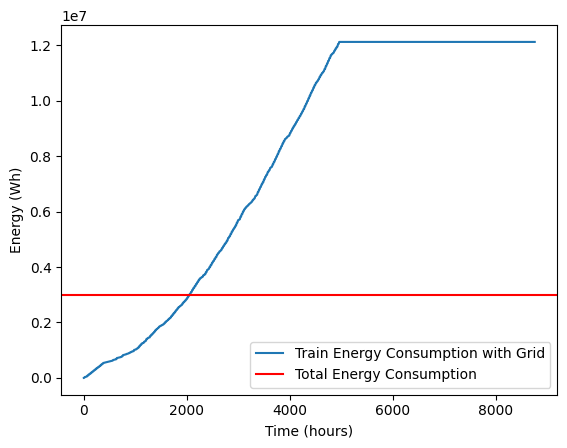

In [190]:
# plot the train energy consumption with grid, with a horizontal line indicating the total energy consumption
plt.plot(train_energy_total_withgrid, label='Train Energy Consumption with Grid')
plt.axhline(y=total_energy*1000, color='r', linestyle='-', label='Total Energy Consumption')
plt.xlabel('Time (hours)')
plt.ylabel('Energy (Wh)')
plt.legend()
plt.show()


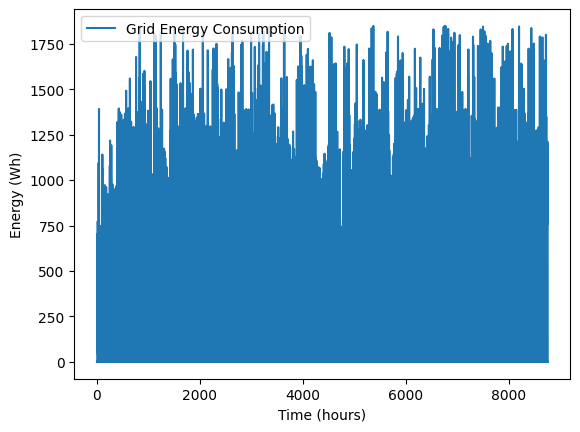

In [191]:
# plot the grid energy consumption using a line chart
plt.plot(grid_energy, label='Grid Energy Consumption')
plt.xlabel('Time (hours)')
plt.ylabel('Energy (Wh)')
plt.legend()
plt.show()

In [204]:
# calculate all the power that consumed from the grid
grid_energy_total = grid_energy.sum()
print('The total energy consumption from the grid is:', grid_energy_total/1000, 'kWh')

The total energy consumption from the grid is: 2848.872093 kWh


### CONDITION 3

In [193]:
# make an assumption that all the energy that generated by the solar panel is stored in a battery which is the ideal case with no upper limit
# once the stored energy is larger than the most efficient level, the energy will be consumed from the battery
battery_save = energy_output - train_consumption
print(battery_save[:20])

[   0.       0.       0.       0.       0.       0.       0.       0.
    0.    1147.074  873.633  349.942  651.579  261.851  962.907 1077.385
  676.073    0.       0.       0.   ]


In [194]:
# sum the battery save energy, and each time the sum value reach to 10000, the battery will be used, and the sum value will be reset to 0
battery_energy = np.zeros(energy_output.shape)
battery_save_sum = 0
for i in range(len(energy_output)):
    battery_save_sum += battery_save[i]
    if battery_save_sum >= 10000:
        battery_energy[i] = battery_save_sum - 10000
        battery_save_sum = 0
    else:
        battery_energy[i] = 0

print(battery_energy[40:60])

[  0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.    958.998
   0.      0.   ]


In [195]:
# for each time the battery_energy is larger than 0, it means the battery is used, and the energy will be consumed from the battery after the solar panel in that day did not generate 
# find out the index of the battery_energy that is larger than 0
index_battery = np.where(battery_energy > 0)[0]
print(index_battery)

[  57   88  153  201  249  303  351  396  490  541  589  635  687  735
  781  831  876  904  948  997 1024 1071 1117 1162 1193 1233 1283 1312
 1359 1407 1449 1476 1501 1545 1593 1623 1671 1712 1739 1768 1810 1837
 1862 1903 1929 1961 2002 2047 2095 2124 2171 2215 2248 2287 2311 2339
 2363 2394 2417 2457 2502 2532 2574 2601 2631 2670 2697 2728 2754 2796
 2841 2867 2892 2921 2962 2987 3015 3055 3085 3114 3154 3179 3208 3230
 3256 3294 3306 3342 3366 3394 3424 3463 3490 3517 3545 3569 3606 3637
 3665 3702 3730 3761 3787 3824 3850 3873 3919 3942 3969 3999 4038 4065
 4090 4123 4166 4193 4238 4277 4291 4326 4350 4374 4399 4423 4447 4470
 4494 4528 4565 4590 4618 4647 4671 4696 4721 4745 4769 4794 4833 4863
 4891 4915 4939 4977 5006 5049 5076 5103 5130 5169 5201 5225 5250 5286
 5316 5341 5383 5410 5431 5457 5483 5513 5550 5576 5603 5632 5675 5706
 5747 5777 5817 5846 5893 5935 5964 5993 6039 6087 6111 6137 6178 6206
 6232 6280 6322 6350 6400 6441 6469 6496 6540 6568 6633 6681 6727 6754
 6800 

In [196]:
print(energy_output[57:70])

[2592.323 4252.783 5616.452 6002.199 5588.17  4436.467 2569.175  747.092
    0.       0.       0.       0.       0.   ]


In [197]:
# find out the 0 value in the energy_output that after the index_battery
first_zero_output_index = []
for i in range(len(index_battery)):
    index_batteryi = index_battery[i]
    first_zero_index = np.where(energy_output[index_batteryi:] == 0)[0][0] + index_batteryi 
    first_zero_output_index.append(first_zero_index)
    
# transform the first_zero_output_index to a ndarray
first_zero_output_index = np.array(first_zero_output_index)
print(first_zero_output_index)

[  65   89  161  209  257  305  353  401  497  545  593  642  689  737
  785  833  882  906  953 1001 1026 1074 1122 1170 1194 1242 1290 1314
 1362 1410 1458 1482 1506 1554 1602 1626 1674 1723 1747 1771 1819 1843
 1866 1915 1939 1963 2011 2059 2107 2131 2179 2227 2251 2299 2323 2347
 2371 2395 2419 2467 2515 2539 2587 2611 2635 2683 2707 2731 2755 2804
 2852 2876 2900 2923 2972 2996 3019 3068 3092 3116 3164 3188 3212 3236
 3260 3308 3308 3356 3380 3404 3428 3476 3500 3524 3548 3572 3620 3644
 3668 3716 3740 3764 3788 3836 3860 3884 3932 3956 3980 4004 4052 4076
 4100 4124 4172 4196 4244 4292 4292 4340 4364 4388 4412 4436 4460 4484
 4508 4532 4580 4604 4628 4652 4676 4700 4724 4748 4772 4796 4844 4868
 4892 4916 4940 4988 5012 5060 5084 5108 5132 5180 5204 5228 5252 5300
 5324 5347 5396 5419 5444 5468 5492 5516 5563 5587 5611 5635 5683 5707
 5755 5779 5827 5851 5899 5947 5971 5995 6043 6091 6115 6139 6186 6210
 6235 6283 6331 6355 6402 6450 6474 6498 6546 6570 6642 6690 6738 6762
 6810 

In [198]:
train_speed_battery = np.zeros(energy_output.shape)
train_consumption_battery = np.zeros(energy_output.shape)
conditions = [
    (energy_output >= level1_consumption) & (energy_output < level2_consumption),
    (energy_output >= level2_consumption) & (energy_output < level3_consumption),
    (energy_output >= level3_consumption) & (energy_output < level4_consumption),
    (energy_output >= level4_consumption) & (energy_output < level5_consumption),
    (energy_output >= level5_consumption) & (energy_output < level6_consumption),
    (energy_output >= level6_consumption) & (energy_output < level7_consumption),
    (energy_output >= level7_consumption) & (energy_output < level8_consumption),
    (energy_output >= level8_consumption) & (energy_output < level9_consumption),
    (energy_output >= level9_consumption) & (energy_output < level10_consumption),
    energy_output >= level10_consumption
]
choices_speed = [level1_speed, level2_speed, level3_speed, level4_speed, level5_speed, level6_speed, 
                 level7_speed, level8_speed, level9_speed, level10_speed]
choices_consumption = [level1_consumption, level2_consumption, level3_consumption, level4_consumption, 
                       level5_consumption, level6_consumption, level7_consumption, level8_consumption,
                       level9_consumption, level10_consumption]

train_speed_battery = np.select(conditions, choices_speed, default=0)
train_consumption_battery = np.select(conditions, choices_consumption, default=0)

print(train_speed_battery[:20], '\n', train_consumption_battery[:20])

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.5 1.  1.  1.  0.5 0.2 0.  0.
 0.  0. ] 
 [   0    0    0    0    0    0    0    0    0 1400 3250 5000 5000 5000
 3250 1400    0    0    0    0]


In [199]:
train_speed_battery[first_zero_output_index] = level10_speed
train_consumption_battery[first_zero_output_index] = level10_consumption

print(train_speed_battery.shape, '\n', train_consumption_battery.shape)
print(train_speed_battery[57:70], '\n', train_consumption_battery[57:70])

(8760,) 
 (8760,)
[0.2 0.5 1.  1.2 1.  0.8 0.2 0.  4.  0.  0.  0.  0. ] 
 [ 1400  3250  5000  5700  5000  4400  1400     0 10000     0     0     0
     0]


In [200]:
train_percentage_battery, train_energy_total_battery=  calculate_train_percentage(total_energy, energy_output, train_speed_battery, train_consumption_battery)

print(train_percentage_battery[:20], '\n', train_energy_total_battery[:20])

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.7 1.7 2.7 3.7 4.2 4.4 4.4
 4.4 4.4] 
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  1400.  4650.  9650. 14650. 19650. 22900. 24300. 24300. 24300. 24300.]


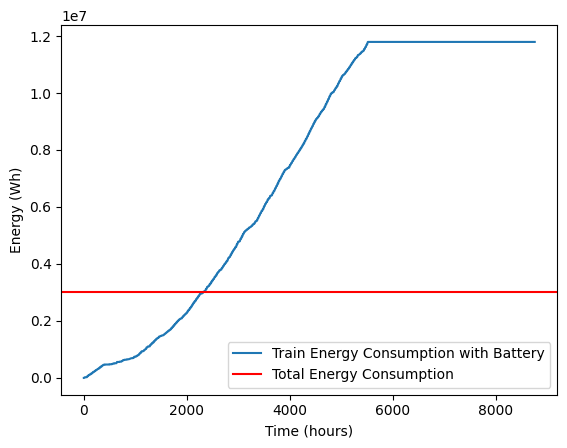

In [201]:
# plot the train energy consumption with battery, with a horizontal line indicating the total energy consumption
plt.plot(train_energy_total_battery, label='Train Energy Consumption with Battery')
plt.axhline(y=total_energy*1000, color='r', linestyle='-', label='Total Energy Consumption')
plt.xlabel('Time (hours)')
plt.ylabel('Energy (Wh)')
plt.legend()
plt.show()

In [202]:
index1_battery = np.where(train_percentage_withgrid >= total_energy)[0][0]
print(index1_battery)

# change the index1_gridth hour in a year to a day in a year
index2_battery = index1_battery % 24
index3_battery = index1_battery // 24
print('the day is:', index3_battery, 'the hour is:', index2_battery)

4960
the day is: 206 the hour is: 16


In [203]:
# calculate the total power consumed when training the model
total_power_consumed_Battery = train_energy_total_battery[:index1_battery]
print('the total power consumed is:', total_power_consumed_Battery[-1]/1000, 'kWh')

the total power consumed is: 10395.6 kWh
